### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.medium_test()

### Exact solutions

[Qibo 0.2.7|INFO|2024-06-01 21:18:52]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-06-01 21:18:52]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-06-01 21:18:53]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Best feasible profit: 207
Minimum energy: -272.926
Minimum energy without offset: -585.8504999999996
s = 0 : [(-1.0000000000000007+0j), (-0.5000000000000001+0j)]
s = 1 : [(-0.9231400173300828+0j), (-0.5604849782412533+0j)]
s = 2 : [(-0.8834893206029588+0j), (-0.6280531835908285+0j)]
s = 3 : [(-0.8753458746829291+0j), (-0.7002519021314872+0j)]
s = 4 : [(-0.901549437156153+0j), (-0.7710032190300972+0j)]
s = 5 : [(-0.9668283465678089+0j), (-0.836284793395992+0j)]
s = 6 : [(-1.0626546796479348+0j), (-0.9090170840263706+0j)]
s = 7 : [(-1.1781720934069668+0j), (-1.0027824624817359+0j)]
s = 8 : [(-1.309113130774856+0j), (-1.1164276196286127+0j)]
s = 9 : [(-1.453659984895693+0j), (-1.2430797698430132+0j)]
s = 10 : [(-1.6097270459191522+0j), (-1.3778094981645534+0j)]


c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


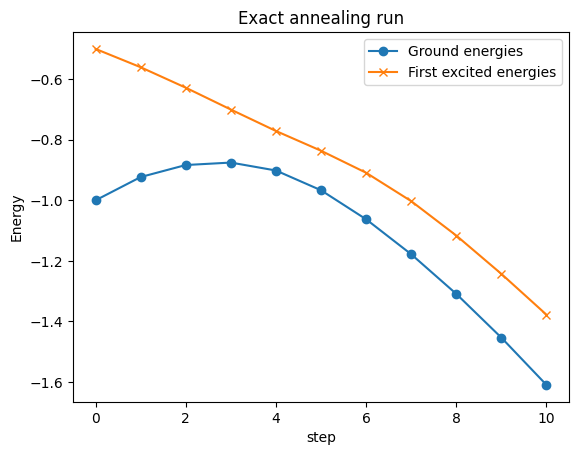

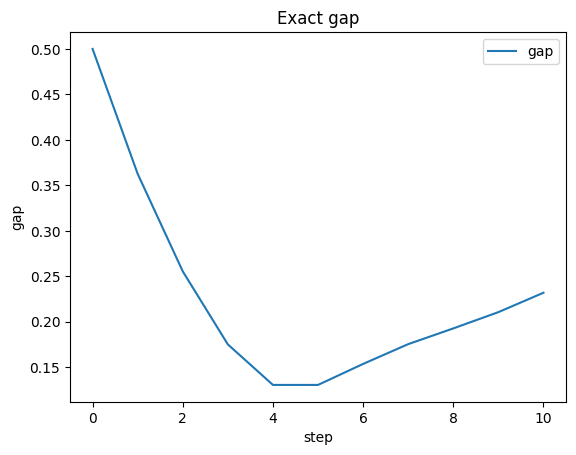

estimated minimum gap:  (0.13054355317181687+0j)


In [2]:
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values)

best_feasible_profit, minimum_energy = exact_solver.run()

print(f'Best feasible profit: {best_feasible_profit}')
print(f'Minimum energy: {minimum_energy}')
print(f'Minimum energy without offset: {minimum_energy - exact_solver.offset}')


exact_solver.annealing_run(10)

### DP

In [3]:
from dp_solver import DP_solver

dp_solver = DP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_solution()

-------- Solution has items:  [0, 3] --------
 - Evaluating candidate  [0, 3]
Profit: 207
Weight: 81 (satisfies constraint W=114)
Energy: -163.44
-------------------------------------------------


### Simulated annealing

In [4]:
from neal_solver import Neal_annealing_solver

H_solver = Neal_annealing_solver(W_capacity, weights, values)
neal_solution_items = H_solver.run()
H_solver.show_solution()

# H_solver.energy_of_items(items_in_solution)


-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


[Qibo 0.2.7|WARNING|2024-06-01 21:18:53]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-06-01 21:18:53]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [0, 2, 3]
fins aqui
Target energy -1.6097270459191522
+ offset (312.9244999999996) = 311.31477295408047
final annealing energy:  -1.5026585151463672
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


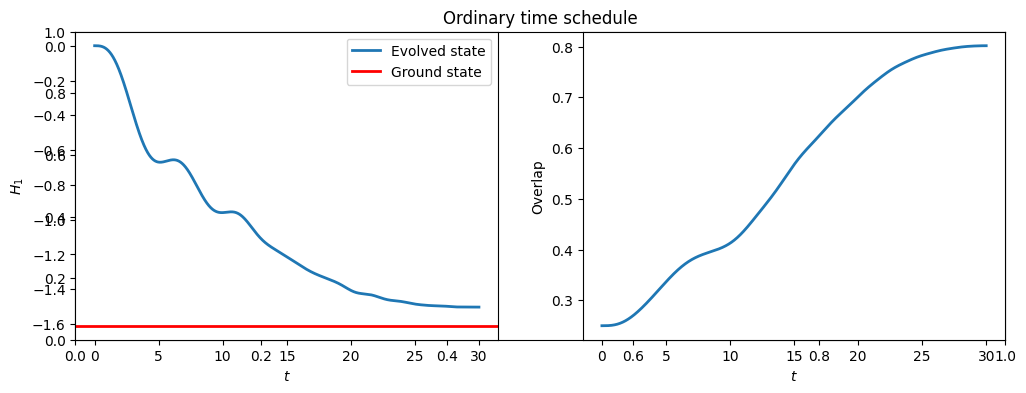

In [5]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()
print('fins aqui')

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

### DMRG

In [6]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

qkp_DMRG.show_solution()

print(' **** Neal solution: ', neal_solution_items, '****')

def convert_to_string(lst, N):
    result = ['0'] * (N)
    for i in lst:
        result[i] = '1'
    return ''.join(result)

print('\n Neal solution:')
qkp_DMRG.energy_of_items(convert_to_string(neal_solution_items, qkp_DMRG.N))


-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------
 **** Neal solution:  [0, 2, 3] ****

 Neal solution:
 - Evaluating candidate  1011
Energy: -1.6097270459191522
+ offset (312.9244999999996) = 311.31477295408047


In [7]:
qkp_DMRG.annealing_run()

TypeError: DMRG_solver.annealing_run() missing 1 required positional argument: 'penalty'